In [3]:
!pip install tqdm
!pip install nbclient

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import trange
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

conv_data = pd.read_csv("datasets\\owid-covid-data.csv")
trade_data = pd.read_csv("datasets\\dataset-covid19-trade-impact.csv")

dates = []
for t in trange(len(trade_data['Date'])):
    date = trade_data['Date'].iloc[t].split('/')
    dates.append(date[2] + '-' + date[1] + '-' + date[0])
trade_data['date'] = dates
del trade_data['Date']

100%|██████████| 111438/111438 [00:00<00:00, 237662.72it/s]


In [5]:
p = conv_data[['date','stringency_index']].dropna().groupby(['date']).mean()
p['date'] = p.index

trade_data = trade_data[trade_data['Country'] == 'All']
trade_data = trade_data[trade_data['Commodity'] == 'All']
trade_data = trade_data[trade_data['Transport_Mode'] == 'All']
del trade_data['Year'], trade_data['Country'], trade_data['Commodity'], trade_data['Transport_Mode'], trade_data['Measure'], trade_data['Weekday']
export_data = trade_data[trade_data['Direction'] == 'Exports']
import_data = trade_data[trade_data['Direction'] == 'Imports']
reimport_data = trade_data[trade_data['Direction'] == 'Reimports']
tot_import_data = pd.merge(import_data,reimport_data,on='date')
tot_import_data['Value'] = tot_import_data['Value_x'] + tot_import_data['Value_y']
tot_import_data['Direction'] = tot_import_data['Direction_x']
del tot_import_data['Value_x'], tot_import_data['Value_y'], tot_import_data['Cumulative_x'], tot_import_data['Cumulative_y'], tot_import_data['Direction_x'], tot_import_data['Direction_y']
import_data = tot_import_data.copy()
import_data['Value_smooth'] = import_data['Value'].rolling(45).mean()
export_data['Value_smooth'] = export_data['Value'].rolling(45).mean()
del tot_import_data

conv_data = conv_data[conv_data['location'] == 'World']
data = pd.concat([import_data,export_data])

C:\Users\teunm\AppData\Local\Temp\ipykernel_29800\2617959592.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  export_data['Value_smooth'] = export_data['Value'].rolling(45).mean()


# The impact van COVID-19 op de wereldhandel  

Jasper Wormsbecher, 14953110   
Doede Cerutti, 14948095  
Teun de Groot, 14892499  
Guido Chung, 15113248  
Team number: F1  

![image_index](images/image_boat.png)

## Introductie  

De coronacrisis heeft een grote impact gehad op verschillende sectoren, zoals onderwijs, economie en gezondheidszorg. Deze situatie heeft ertoe geleid dat mensen zoveel mogelijk geïsoleerd moesten worden om de verspreiding van het virus te beperken.
De COVID-19 pandemie heeft de wereldhandel verstoord, wat gevolgen had voor import, export en economische stabiliteit in verschillende regio's en sectoren. Dit project onderzoekt de impact van de pandemie op de handel door trends, verschuivingen en herstel te analyseren. We verkennen meerdere perspectieven om een uitgebreid inzicht te geven in hoe de pandemie de dynamiek van de wereldhandel heeft beïnvloed.

## Dataset en Preprocessing  

1. Wereldhandelsdata (https://github.com/farhansadeed/Python-COVID-19-Trade-Impact-Data-Analysis) 
2. Covid-19 data (https://covid.ourworldindata.org/data/owid-covid-data.csv)

We hebben gebruikgemaakt van twee datasets, geselecteerd om zowel de wereldhandel als de COVID-19 crisis te analyseren. Hierbij hebben we ervoor gekozen om ons uitsluitend op wereldwijde gegevens te richten, waardoor we geen uitspraken kunnen doen over individuele landen.

Om de gegevens op te schonen, hebben we kolommen hernoemd en geherstructureerd voor samenvoeging. We hebben de kolommen handmatig geïnspecteerd en samengevoegd op basis van overeenkomende namen of inhoud. Tijdens dit proces hebben we meteen de niet-relevante kolommen verwijderd.


Hierna zijn de totaal 77 columns en samen 514232 rijen gereduceerd tot een dataset van 31 columns met 711 rijen. Voor sommige visualisaties worden de individuele datasets gebruikt.
Variable descriptions

Voor sommige visualisaties worden de individuele datasets gebruikt.  
**De variabelen in de uiteindelijke dataset omvatten:**  

**Continuous / Ratio variables:** total_cases, new_cases, new_cases_smoothed, total_deaths,new_deaths, new_deaths_smoothed, total_cases_per_million,new_cases_per_million, new_cases_smoothed_per_million,total_deaths_per_million, new_deaths_per_million,new_deaths_smoothed_per_million, total_vaccinations, people_vaccinated, people_fully_vaccinated,total_boosters, new_vaccinations, new_vaccinations_smoothed,total_vaccinations_per_hundred, people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred, total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred, Value_x, Cumulative_x, Value_y, Cumulative_y, reproduction_rate  
**discrete / interval:** ‘date’  

**De variabelen in de covid-19 dataset variabele:**  

**discrete / nominal:** iso_code, location  
**discrete / interval:** date  
**continues / ratio:** total_cases, new_cases, new_cases_smoothed, total_deaths, new_deaths, new_deaths_smoothed, total_cases_per_million, new_cases_per_million, new_cases_smoothed_per_million, total_deaths_per_million, new_deaths_per_million, new_deaths_smoothed_per_million, reproduction_rate, icu_patients, icu_patients_per_million, hosp_patients, hosp_patients_per_million, weekly_icu_admissions, weekly_icu_admissions_per_million, weekly_hosp_admissions, weekly_hosp_admissions_per_million, total_tests, new_tests, total_tests_per_thousand, new_tests_per_thousand,new_tests_smoothed, new_tests_smoothed_per_thousand, positive_rate, tests_per_case, tests_units, total_vaccinations, people_vaccinated, people_fully_vaccinated, total_boosters, new_vaccinations, new_vaccinations_smoothed, total_vaccinations_per_hundred, people_vaccinated_per_hundred, people_fully_vaccinated_per_hundred, total_boosters_per_hundred, new_vaccinations_smoothed_per_million, new_people_vaccinated_smoothed, new_people_vaccinated_smoothed_per_hundred, stringency_index, population_density, median_age, aged_65_older, aged_70_older, gdp_per_capita, extreme_poverty, cardiovasc_death_rate, diabetes_prevalence, female_smokers, male_smokers, handwashing_facilities, hospital_beds_per_thousand, life_expectancy, human_development_index, population, excess_mortality_cumulative_absolute, excess_mortality_cumulative, excess_mortality, excess_mortality_cumulative_per_million

**De variabelen in de economische dataset variabele:**  

**discrete / nominal:** 'Direction'  
**discrete / interval:** ‘date’  
**continues / ratio:** 'Value', 'Cumulative'  

## De invloed van vaccinaties op de zorg en overheidsmaatregelen  

Vaccinaties spelen een cruciale rol in de verbetering van de wereldgezondheid. Door het voorkomen van ernstige ziektes en het verminderen van de verspreiding van besmettelijke aandoeningen, dragen vaccinaties bij aan een algehele verbetering van de medische situatie wereldwijd.  

### Doden veroorzaakt door covid-19  

Om te kunnen bepalen of de vaccinaties beter waren voor de wereld op medisch gebied moeten we eerst specificeren wat “goed” is. Hierbij gaan we analyseren of de vaccinaties ervoor gezorgd hebben dat er minder doden en totale gevallen waren.  

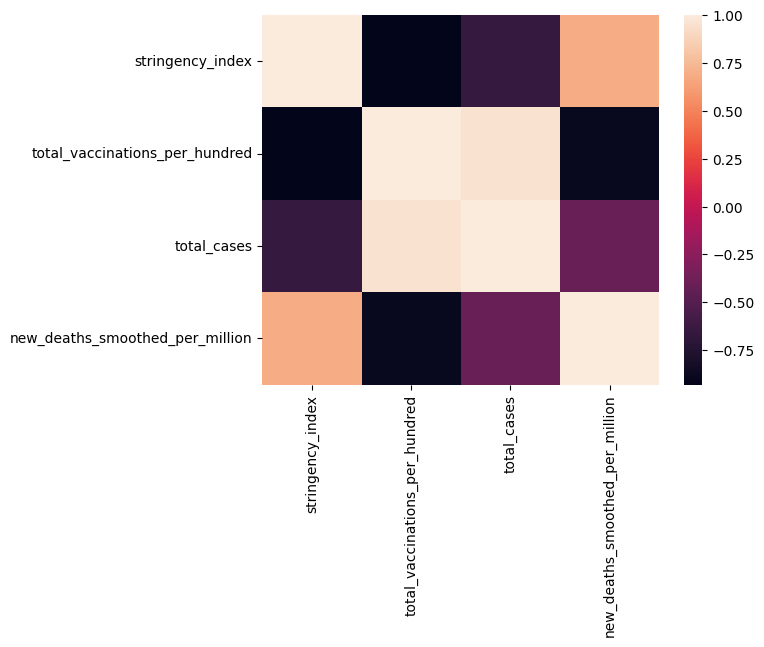

In [6]:
p.index = np.arange(len(p))
con = pd.merge(p,conv_data[['total_vaccinations_per_hundred', 'total_cases', 'new_deaths_smoothed_per_million','date']], on='date')
sns.heatmap(con[['stringency_index','total_vaccinations_per_hundred', 'total_cases', 'new_deaths_smoothed_per_million']].corr(),)
plt.show()

We hebben ontdekt dat er een correlatie bestaat tussen vaccinaties en de totale hoeveelheid doden in de wereld. Wanneer de vaccinaties omhoog gaan, gaan de vaccinaties ook omhoog. Dit komt niet omdat vaccinaties doden veroorzaken. Maar omdat corona doden veroorzaakt en de vaccinatiegraad ook langzaam over tijd omhoog gaat. Hierdoor heb je een correlatie, maar geen causaliteit. Wanneer de vaccinatiegraad omhoog gaat, dan zijn er minder nieuwe doden, omdat er een zware negatieve correlatie is tussen de vaccinatiegraad en de hoeveelheid nieuwe doden.  

Verder vonden kijken we naar de stringency index, dit is een samengestelde maatstaf die de strengheid van overheidsmaatregelen in reactie op de COVID-19-pandemie kwantificeert. Deze index maakt deel uit van de Oxford COVID-19 Government Response Tracker (OxCGRT) en wordt berekend met de deze formule:  

![image_index](images/image_index.png)

De index wordt berekend aan de hand van de volgende maatregelen:
- Sluiting van scholen
- Sluiting van werkplekken
- Annulering van publieke evenementen
- Beperkingen op bijeenkomsten
- Sluiting van openbaar vervoer
- Blijf-thuis voorschriften
- Beperkingen op interne verplaatsingen
- Internationale reisbeperkingen
- Publieke voorlichtingscampagnes  

De index varieert van 0 tot 100, waarbij hogere waarden een strengere overheidsreactie aangeven.
In het kort, de hoeveelheid maatregelen die een overheid nam om de corona crisis te beteugelen. Hierdoor kunnen we het beleid van de overheden meenemen in de conclusie. We kunnen zeggen dat de vaccinatie 1 van de factoren is geweest die ervoor heeft gezorgd dat minder doden zijn gevallen, omdat tijd of natuurlijke blootstelling aan het virus ook een factor kan zijn.


In [13]:
fig = px.scatter(conv_data, 'total_vaccinations_per_hundred','new_deaths_smoothed_per_million',title='total_vaccinations_per_hundred vs new_deaths_smoothed_per_million')
fig.show()



### Nieuwe gevallen  

Verder zouden we graag willen weten hoe de vaccinatiegraad de hoeveelheid corona gevallen beïnvloed. 

In [14]:

fig = px.scatter(conv_data, 'total_vaccinations_per_hundred','new_cases_smoothed_per_million', title='total_vaccinations_per_hundred vs new_cases_smoothed_per_million')
fig.show()

We vinden geen correlatie tussen de vaccinatiegraad en nieuwe gevallen van corona. Hierdoor kunnen we niet vaststellen dat een vaccinatie helpt bij het verminderen van de verspreiding van corona. Zoals wij het hier zien, heb je een vrij constante hoeveelheid mensen die ziek worden van het virus, ook al zien we wel wanneer de vaccinatiegraad hoger ligt dat er een stijging van nieuwe corona gevallen is. Hier hebben wij geen goede verklaring voor. Maar we kunnen speculeren dat dit een geval is van toeval. Verder is het ook belangrijk om dit te melden, want dan weten we in de toekomst wat een vaccinatie wel en niet bestrijdt.

We kunnen deze 2 argumenten samen zetten en dan krijgen we de volgende figuur.


In [9]:
d = conv_data[['population','total_cases','total_deaths']]

d.dropna(inplace=True)


fig = go.Figure(go.Funnelarea(
    labels=["population", "total_cases", "total_deaths"],
    text = ["population","total_cases", "total_deaths"],
    values = [d['population'].iloc[-1], d['total_cases'].iloc[-1], d['total_deaths'].iloc[-1]]
    ))
fig.update_layout(
    title_text="verhouding populatie, total cases en total deaths",
)
fig.show()

C:\Users\teunm\AppData\Local\Temp\ipykernel_29800\626963958.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




Hierin is te zien, dat een groot deel van de bevolking volgens onze data corona heeft gekregen. Dit kan komen omdat het in bepaalde delen van de wereld het moeilijk is om te bepalen hoeveel corona gevallen er daadwerkelijk aanwezig zijn. Wat we wel hieruit kunnen concluderen is dat er maar een kleine kans is om van corona dood te gaan. Dit is niet te zien in het figuurtje aangezien het percentage zo klein is. 
Het onderdeel "total deaths" heeft maar een grootte van 0.08%.

## De invloed van vaccinaties op de economie

De invloed van vaccinaties op de economie is aanzienlijk en veelzijdig. Vaccinaties spelen een belangrijke rol in het bevorderen van economische stabiliteit en groei wereldwijd.  

### Handelsactiviteit

In 2021 zien we een significante toename in het aantal vaccinaties. Dit valt samen met een herstellende trend in zowel de import- als exportwaarden, die in 2020 een dip vertonen. Deze gelijktijdige beweging suggereert een correlatie tussen het aantal vaccinaties en het herstel van de handelsactiviteiten.


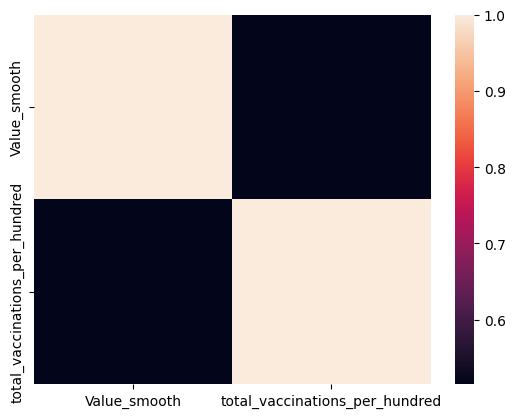

In [10]:
conv_data = conv_data[conv_data['location'] == 'World']
data = pd.concat([import_data,export_data])
sns.heatmap(pd.merge(data,conv_data,on='date')[['Value_smooth','total_vaccinations_per_hundred']].corr())
plt.show()


De stijging van het aantal vaccinaties zou hebben kunnen bijdragen aan het heropenen van economieën, wat mogelijk resulteerde in verhoogde economische activiteit. Dit herstel lijkt weerspiegeld te worden in de import- en exportsectoren, zoals te zien is in de grafiek. Naarmate de bevolking gevaccineerd werd, nam wellicht het vertrouwen van bedrijven en consumenten toe, wat mogelijk heeft bijgedragen aan een toename van de handelsactiviteiten.  

In [11]:

fig = px.line(data,x='date',y='Value_smooth', color='Direction')
fig.add_trace(
    go.Scatter(
            x=conv_data['date'],
            y=conv_data['total_vaccinations_per_hundred'],
            yaxis="y2",
            name='total_vaccinations_per_hundred'
        ),
)

fig.update_layout(
    xaxis=dict(
        domain=[0.05, 0.95]
    ),
    yaxis=dict(
        title="Value Smooth",
        titlefont=dict(
            color="#1f77b4"
        ),
        tickfont=dict(
            color="#1f77b4"
        )
    ),
    yaxis2=dict(
        title="total_vaccinations_per_hundred",
        titlefont=dict(
            color="#ff7f0e"
        ),
        tickfont=dict(
            color="#ff7f0e"
        ),
        anchor="free",
        overlaying="y",
        side="left",
        position=0
    ),
    yaxis3=dict(
        title="yaxis3 title",
        titlefont=dict(
            color="#d62728"
        ),
        tickfont=dict(
            color="#d62728"
        ),
        anchor="x",
        overlaying="y",
        side="right"
    ),
    yaxis4=dict(
        title="yaxis4 title",
        titlefont=dict(
            color="#9467bd"
        ),
        tickfont=dict(
            color="#9467bd"
        ),
        anchor="free",
        overlaying="y",
        side="right",
        position=1
    )
)

# Update layout properties
fig.update_layout(
    title_text="vaccinatie-graad en import vs time",
)

fig.show()

### Overheidsmaatregelen  

Het is bekend dat beleidsmaatregelen zoals lockdowns en reisbeperkingen, gemeten door de Stringency Index, een aanzienlijke invloed hebben op internationale handelsstromen, waaronder import en export(Amador et al., 2023). Een analyse van de dataset toont een duidelijk verband tussen deze beleidsmaatregelen en schommelingen in import- en export waarden. De grafiek toont de import- en export waarden over de tijd, evenals de Global Stringency Index.  

In [12]:

fig = px.line(data,x='date',y='Value_smooth', color='Direction')
fig.add_trace(
    go.Scatter(
            x=p['date'],
            y=p['stringency_index'],
            yaxis="y2",
            name='Global Stringency Index'
        ),
)

fig.update_layout(
    xaxis=dict(
        domain=[0.05, 0.95]
    ),
    yaxis=dict(
        title="Value Smooth",
        titlefont=dict(
            color="#1f77b4"
        ),
        tickfont=dict(
            color="#1f77b4"
        )
    ),
    yaxis2=dict(
        title="Stringency Index",
        titlefont=dict(
            color="#ff7f0e"
        ),
        tickfont=dict(
            color="#ff7f0e"
        ),
        anchor="free",
        overlaying="y",
        side="left",
        position=0
    ),
    yaxis3=dict(
        title="yaxis3 title",
        titlefont=dict(
            color="#d62728"
        ),
        tickfont=dict(
            color="#d62728"
        ),
        anchor="x",
        overlaying="y",
        side="right"
    ),
    yaxis4=dict(
        title="yaxis4 title",
        titlefont=dict(
            color="#9467bd"
        ),
        tickfont=dict(
            color="#9467bd"
        ),
        anchor="free",
        overlaying="y",
        side="right",
        position=1
    )
)

# Update layout properties
fig.update_layout(
    title_text="stringency index en import vs time",
)

fig.show()



Tijdens periodes waarin de Stringency Index stijgt, wat wijst op strikte maatregelen zoals lockdowns, zien we een duidelijke daling in zowel import- als export waarden. Dit komt doordat strenge maatregelen leiden tot verstoringen in de toeleveringsketen. Bijvoorbeeld, tijdens de COVID-19-pandemie in 2020 en begin 2021, is er een duidelijke afname in handelsactiviteiten zichtbaar.
Naarmate de Stringency Index daalt en maatregelen versoepelen, zien we een herstel in zowel import- als exportwaarden. Dit herstel weerspiegelt de hernieuwde economische activiteit en hervatting van internationale handel na het terugdraaien van overheidsinmenging.  

## Feedback en Reflectie  

Op 25 juni 2024 is onze groep bijeengekomen op Science Park voor het feedbackmoment. Hier zijn een aantal zwakke punten van het project aangekaart.  

- Ten tijde van het feedbackmoment maakten we nog enkel gebruik van lijngrafieken, het advies was dan ook meer verschillende soorten grafieken te gebruiken. Hierdoor komt de boodschap die we over willen brengen met de data beter tot zijn recht.  
- Alle grafieken waar we gebruik van maakten hadden variabelen op de y-as en tijd op de x-as. Het advies was andere variabelen dan enkel de tijd op de x-as te gebruiken.  
- Twee plots die los van elkaar staan en beiden tijd op de x-as hebben, kunnen niet zomaar met elkaar vergeleken worden. Oftewel voorzichtiger taalgebruik; plots geven enkel correlaties weer. We concludeerden bijvoorbeeld dat er een causaal verband is tussen een hogere vaccinatiegraad en een kleinere stringency index hoewel dit enkel correlatie is.  
- Een van de grafieken waar we gebruik van maakten gaf cumulatief de covid-19 cases van elk land in de wereld apart weer, met een dikkere lijn om de gemiddelde trend aan te geven. Dit was erg onoverzichtelijk.  

Reflecterend op het verloop van het project zijn er twee dingen waar we op vastliepen.  

Ten eerste hebben we erg geworsteld met het vinden van een goed onderwerp. Dit is het gevolg van gebrekkig onderzoek naar correlaties tussen de datasets waar we destijds gebruik van maakten. Om deze reden gaat onze final delivery over een ander onderwerp dan onze proposal.  

Het tweede punt is dat we erg inefficiënt hebben gewerkt in verband met miscommunicatie. Meerdere keren is het voorgekomen dat men dubbel werk heeft verricht, zoals het zoeken naar correlaties of het maken van plots.  

## Werkverdeling  

**Guido**  
Guido heeft ervoor gezorgd dat de teksten goed leesbaar zijn. Verder heeft hij een van de perspectieven, de samenvatting en het stuk over de dataset en de preprocessing geschreven. Ook heeft hij aan de introductie gewerkt.  

**Jasper**  
Jasper heeft het grootste deel van het coderen gedaan, zoals preprocessing, het vinden van correlaties en het maken van de plots waar gebruik van is gemaakt in de definitieve versie van het project. Verder heeft hij het verhaal rondom de data en plots in goede banen geleid en de introductie met Guido geschreven. Ook heeft hij het project gepresenteerd tijdens het feedbackmoment. Jasper hield de planning bij en had goed overzicht over de te verdelen taken.  

**Doede**  
Doede heeft een grootste deel van de argumenten uitgewerkt en geholpen bij het bedenken van plots die deze argumenten ondersteunen. Ook heeft hij de feedback bijgehouden.
Doede heeft net als Jasper gewerkt aan het vinden van correlaties en het maken van plots, dit is onderdeel van het dubbele werk dat genoemd wordt in de reflectie.  

**Teun**  
Teun heeft aan de argumenten en de globale verhaallijn gewerkt. Verder heeft hij het stukje feedback en reflectie en deze work distribution geschreven.
Teun heeft net als Doede feedback bijgehouden tijdens het feedbackmoment en aan het begin van het project dubbel werk verricht met betrekking tot het zoeken naar correlaties en het maken van plots. Als laatste heeft hij de jupyterbook in elkaar gezet.  

## Samenvatting  
De corona pandemie heeft wereldwijd een aanzienlijke invloed gehad op zowel de sociale als de economische sectoren. Om deze impact te meten, is er veel data verzameld en in ons onderzoek hebben we ons gericht op vaccinaties, import/export en de stringency index. Uit onze analyse bleek dat vaccinaties mogelijk hebben bijgedragen aan herstel op zowel medisch als economisch gebied. Hoewel er geen direct verband werd gevonden tussen de vaccinatiegraad en het aantal nieuwe corona gevallen, was er economisch herstel zichtbaar in de import- en exportwaarden naarmate de vaccinatiegraad toenam en de overheidsmaatregelen versoepelden. Verdere studie is echter nodig om deze bevindingen te bevestigen en om een dieper inzicht te krijgen in de complexiteit van de relatie tussen vaccinaties, economische activiteit en beleidsmaatregelen gedurende de pandemie.  

## Bronnen  

Our World in Data. (2024). COVID-19 Data [Data set]. Our World in Data. https://covid.ourworldindata.org/data/owid-covid-data.csv  

Amador, J., Gouveia, C. M., & Pimenta, A. C. (2023). COVID-19, lockdowns and international trade: evidence from firm-level data. Empirical Economics, 65(5), 2427–2466. https://doi.org/10.1007/s00181-023-02421-x  

COVID-19. (2023, 5 juni). European Centre For Disease Prevention And Control. https://www.ecdc.europa.eu/en/covid-19  

COVID-19 vaccination. (z.d.). RIVM. https://www.rivm.nl/en/covid-19-vaccination  

Farhansadeed. (z.d.). GitHub - farhansadeed/Python-COVID-19-Trade-Impact-Data-Analysis: This repository contains an analysis of the effects of COVID-19 on trade trends up to December 2021. The dataset used provides daily trade values. We identified annual trends, commodity impacts, transport mode influences, and country-specific effects by using Python, Pandas and Matplotlib. GitHub. https://github.com/farhansadeed/Python-COVID-19-Trade-Impact-Data-Analysis  

Netherlands, S. (2023, 3 mei). More strikes but fewer strikers in 2022. Statistics Netherlands. https://www.cbs.nl/en-gb/news/2023/18/more-strikes-but-fewer-strikers-in-2022
